In [ ]:
#Likelihood of  Cardiovascular Disease

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart_disease_prediction.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
num_observations, num_features = df.shape
print(f"Number of observations: {num_observations}")
print(f"Number of features: {num_features}")

Number of observations: 918
Number of features: 12


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
# Calculating the number of missing values in all columns
missing_values = df.isnull().sum()
missing_values


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

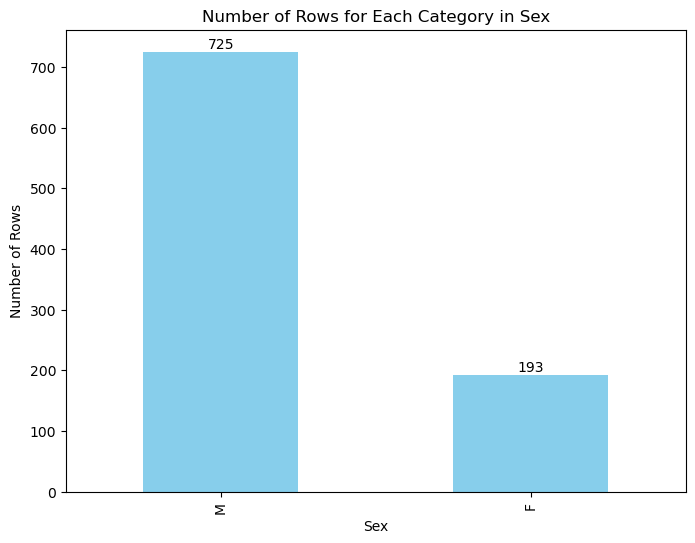

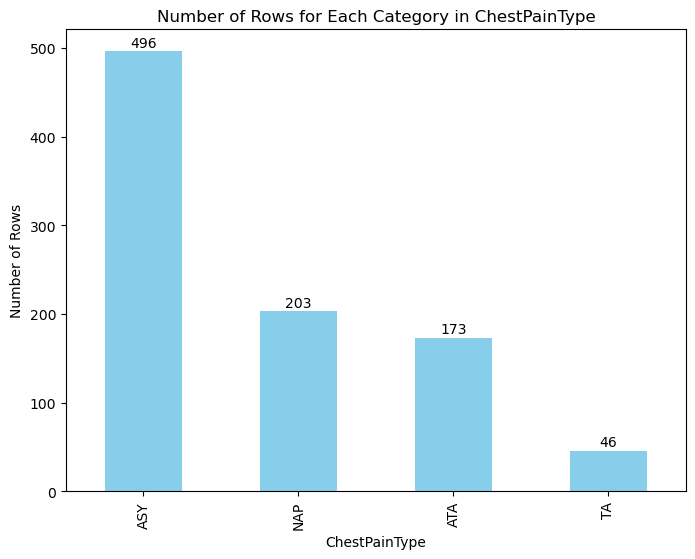

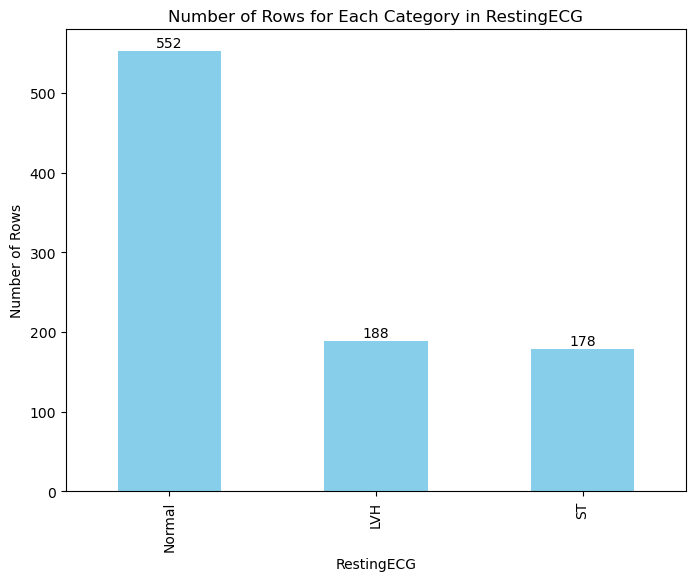

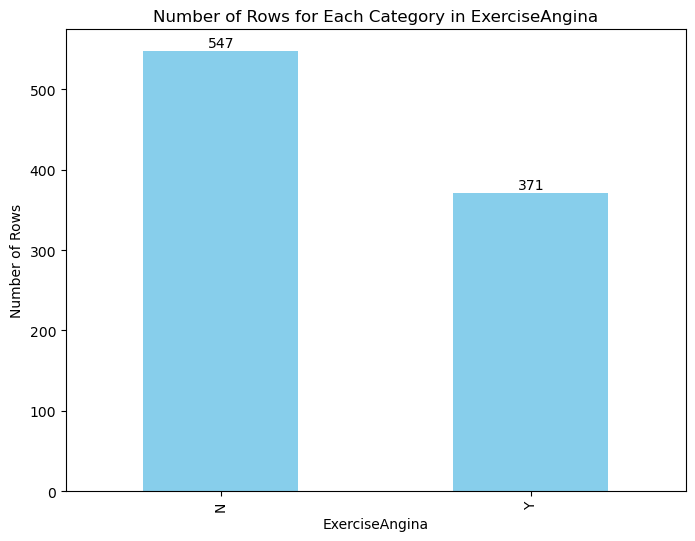

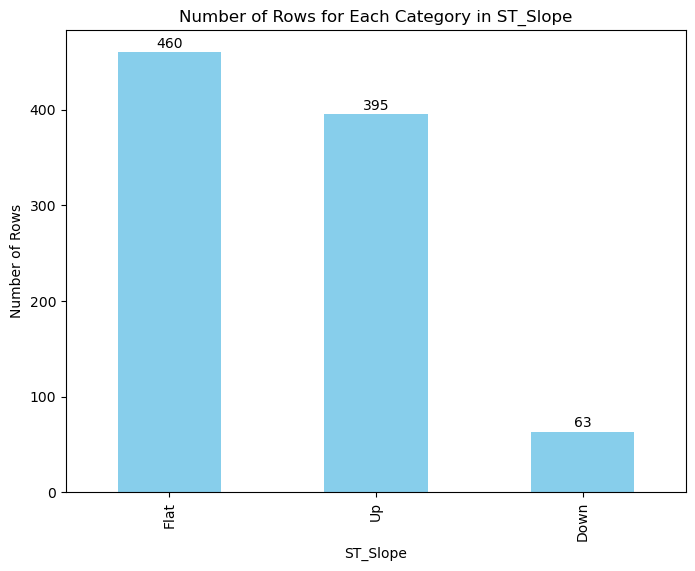

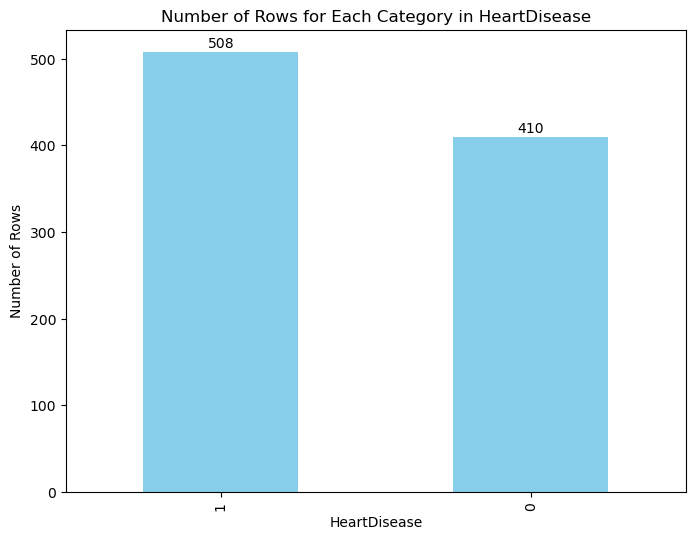

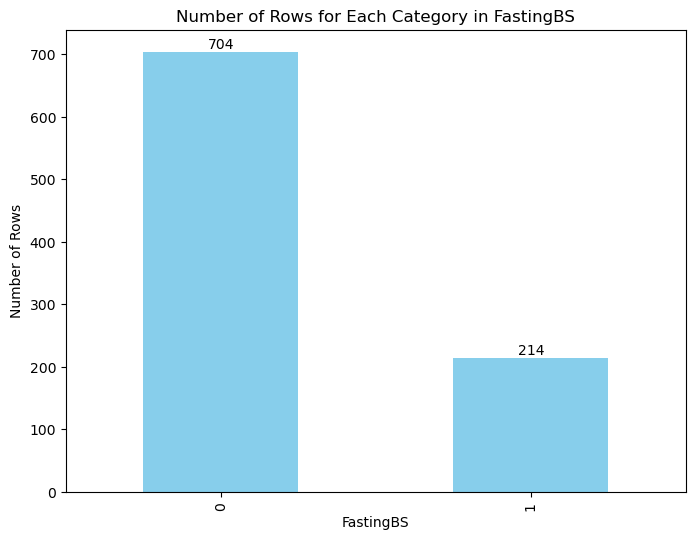

In [10]:
# Creating bar charts for each categorical column

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'FastingBS']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Number of Rows for Each Category in {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Rows')
    for index, value in enumerate(df[column].value_counts()):
        plt.text(index, value + 5, str(value), ha='center')
    plt.show()


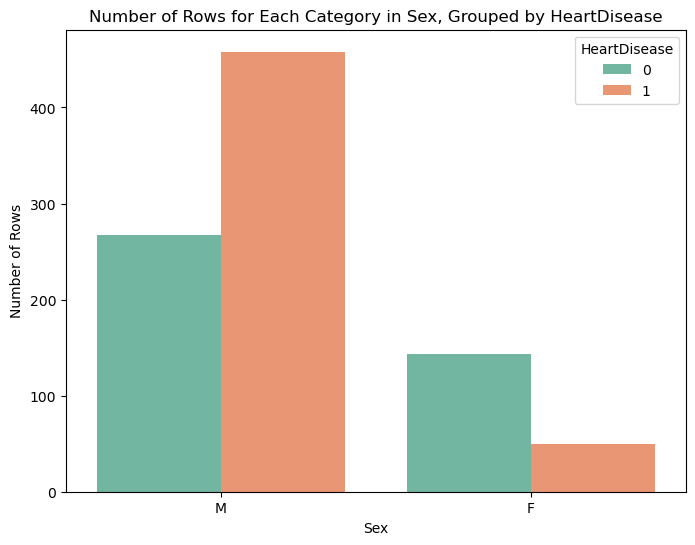

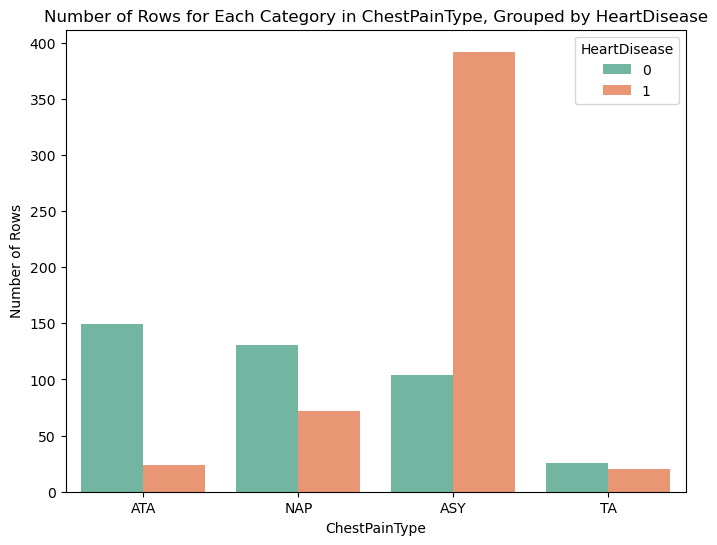

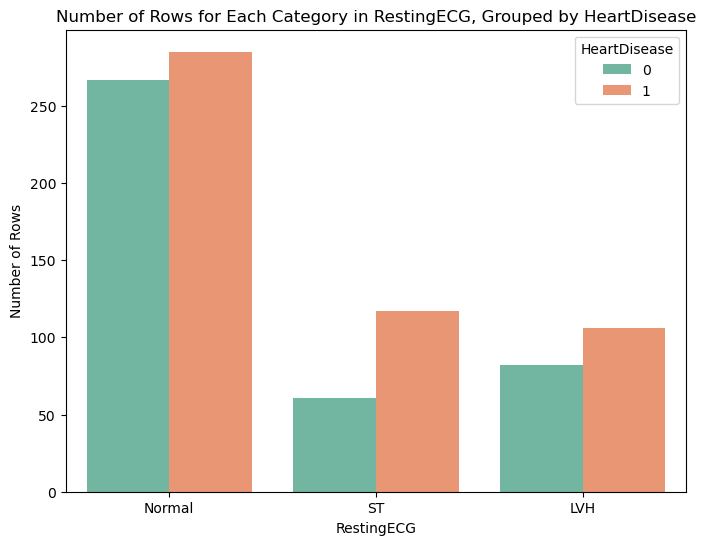

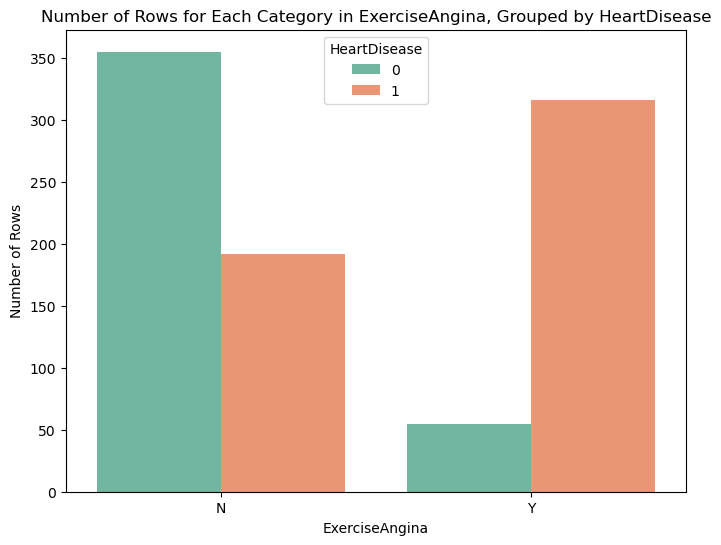

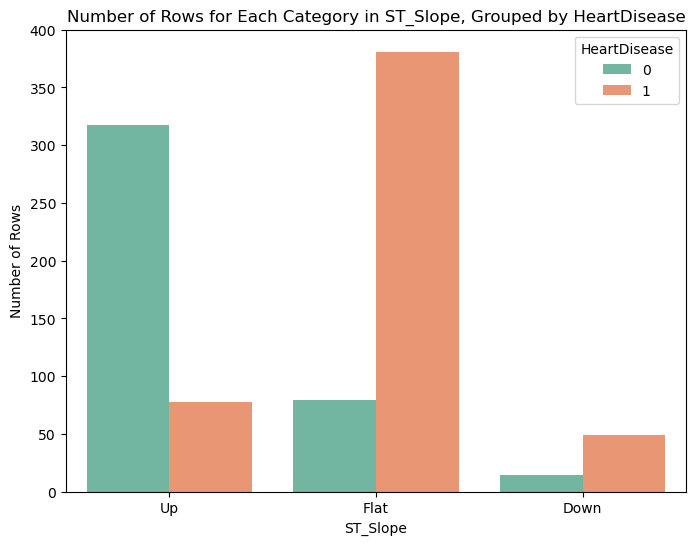

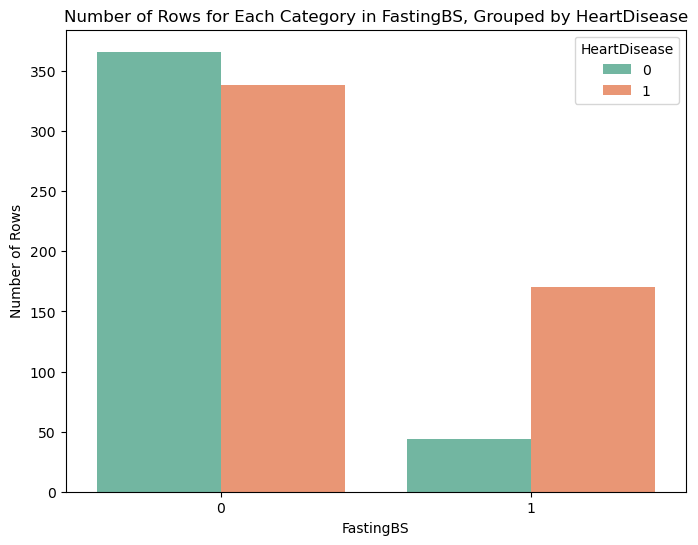

In [11]:
# Creating bar charts for each categorical column, grouped by HeartDisease

for column in categorical_columns:
    if column != 'HeartDisease':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column, hue='HeartDisease', palette='Set2')
        plt.title(f'Number of Rows for Each Category in {column}, Grouped by HeartDisease')
        plt.xlabel(column)
        plt.ylabel('Number of Rows')
        plt.legend(title='HeartDisease')
        plt.show()

        

In [12]:
### Summary of Insights from the Categorical Data Plots

#- **Gender Distribution**: The plots may reveal the distribution of male and female patients. For example, if the majority of patients are male, this could be an important factor in the analysis.
  
#- **Chest Pain Types**: By analyzing the chest pain types, you can identify which types are more prevalent among patients with heart disease. If a particular type of chest pain is more common in heart disease patients, it might be a key feature for prediction.

#- **Exercise Angina**: The data might show a strong correlation between the presence of exercise-induced angina and heart disease, which would be an important insight for predicting the condition.

#- **Fasting Blood Sugar**: By reviewing the data grouped by fasting blood sugar, the relationship between high fasting blood sugar levels and heart disease might be evident.

#These visualizations and insights can guide further exploration and model building by highlighting which features are most correlated with heart disease.


In [13]:
# Percentage of male patients over 50 years old with heart disease
male_over_50_with_hd = df[(df['Sex'] == 'M') & (df['Age'] > 50) & (df['HeartDisease'] == 1)]
percentage_male_over_50_with_hd = len(male_over_50_with_hd) / len(df[df['Sex'] == 'M']) * 100
print(f"Percentage of male patients over 50 years old with heart disease: {percentage_male_over_50_with_hd:.2f}%")

# Median age of patients diagnosed with heart disease
median_age_hd = df[df['HeartDisease'] == 1]['Age'].median()
print(f"Median age of patients diagnosed with heart disease: {median_age_hd}")


Percentage of male patients over 50 years old with heart disease: 47.45%
Median age of patients diagnosed with heart disease: 57.0


In [14]:
# Counting the number of rows that have a 0 value for RestingBP
zero_restingbp_count = df[df['RestingBP'] == 0].shape[0]
print(f"Number of rows with 0 RestingBP: {zero_restingbp_count}")

# Counting the number of rows that have a 0 value for Cholesterol
zero_cholesterol_count = df[df['Cholesterol'] == 0].shape[0]
print(f"Number of rows with 0 Cholesterol: {zero_cholesterol_count}")


Number of rows with 0 RestingBP: 1
Number of rows with 0 Cholesterol: 172


In [15]:
# Replacing 0 values in RestingBP and Cholesterol with the median value based on HeartDisease
df['RestingBP'] = df.apply(
    lambda row: df[(df['RestingBP'] != 0) & (df['HeartDisease'] == row['HeartDisease'])]['RestingBP'].median()
    if row['RestingBP'] == 0 else row['RestingBP'], axis=1)

df['Cholesterol'] = df.apply(
    lambda row: df[(df['Cholesterol'] != 0) & (df['HeartDisease'] == row['HeartDisease'])]['Cholesterol'].median()
    if row['Cholesterol'] == 0 else row['Cholesterol'], axis=1)


In [16]:
# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1,FastingBS_1
0,40,140.0,289.0,172,0.0,1,1,0,0,1,0,0,0,1,0,0
1,49,160.0,180.0,156,1.0,0,0,1,0,1,0,0,1,0,1,0
2,37,130.0,283.0,98,0.0,1,1,0,0,0,1,0,0,1,0,0
3,48,138.0,214.0,108,1.5,0,0,0,0,1,0,1,1,0,1,0
4,54,150.0,195.0,122,0.0,1,0,1,0,1,0,0,0,1,0,0


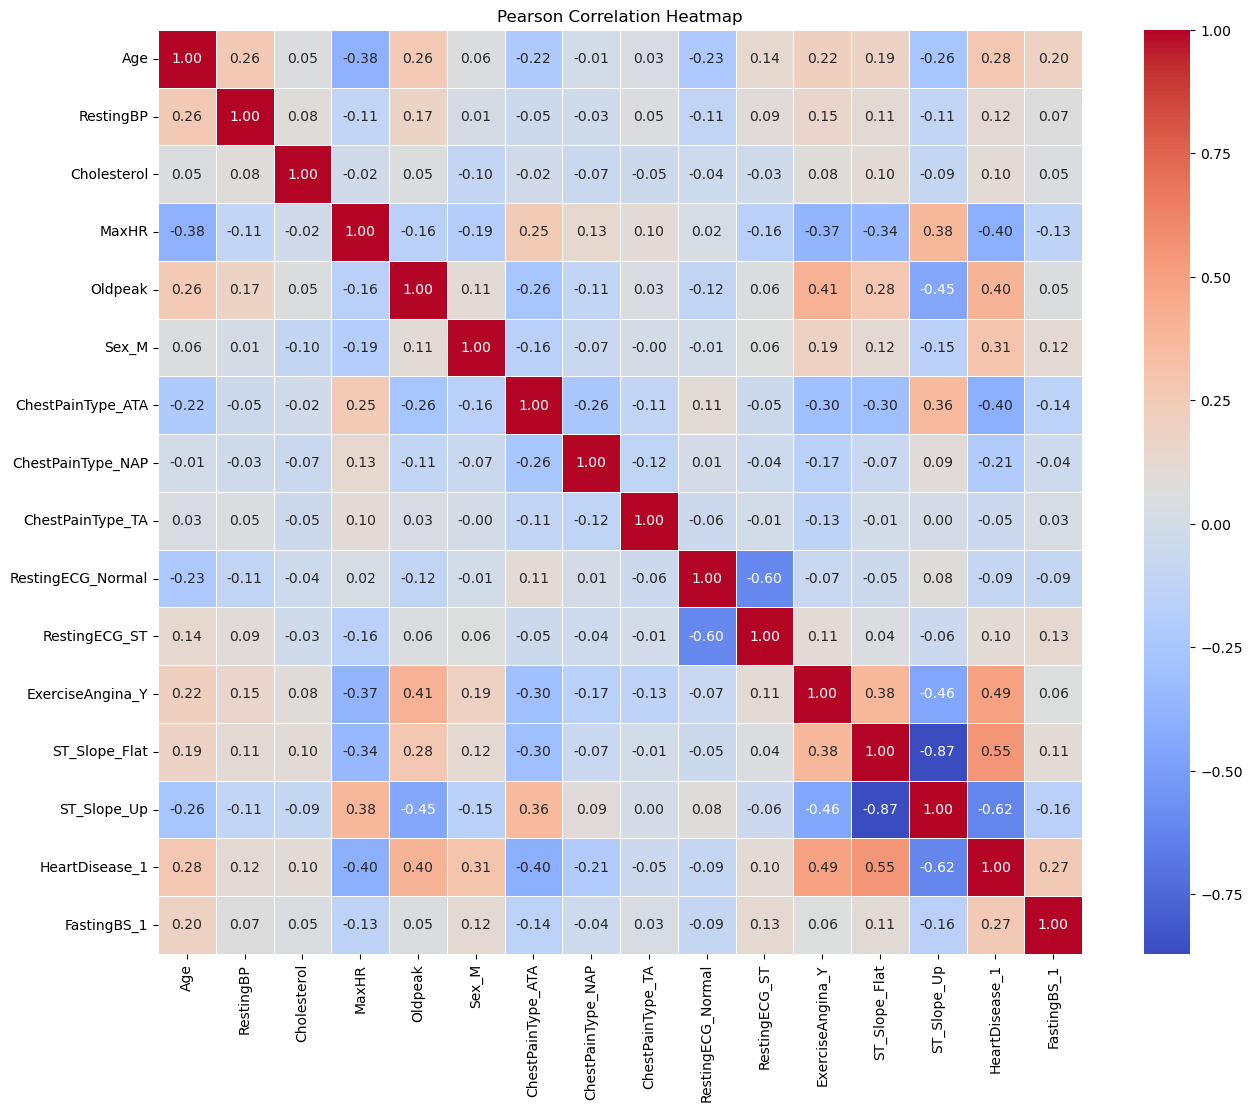

In [17]:
# Calculate Pearson's correlation coefficients
correlation_matrix = df_encoded.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()


In [18]:
# Calculate the square of the Pearson correlation coefficients for HeartDisease
correlation_squared = correlation_matrix['HeartDisease_1'] ** 2

# Sort features by their squared correlation with HeartDisease
sorted_correlation_squared = correlation_squared.sort_values(ascending=False)
print(sorted_correlation_squared)


HeartDisease_1       1.000000
ST_Slope_Up          0.387088
ST_Slope_Flat        0.307064
ExerciseAngina_Y     0.244315
Oldpeak              0.163176
ChestPainType_ATA    0.161543
MaxHR                0.160337
Sex_M                0.093297
Age                  0.079546
FastingBS_1          0.071445
ChestPainType_NAP    0.045354
RestingBP            0.013902
Cholesterol          0.010771
RestingECG_ST        0.010512
RestingECG_Normal    0.008387
ChestPainType_TA     0.003002
Name: HeartDisease_1, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df_encoded, test_size=0.3, random_state=42)

# Define the target variable and the feature set
X_train = train_df.drop(columns='HeartDisease_1')
y_train = train_df['HeartDisease_1']
X_val = val_df.drop(columns='HeartDisease_1')
y_val = val_df['HeartDisease_1']


In [20]:
# Print the column names to check for exact names
print(df_encoded.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_M',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease_1', 'FastingBS_1'],
      dtype='object')


In [21]:
# Updated list of selected features based on exact column names
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS_1', 
                     'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 
                     'ChestPainType_TA', 'RestingECG_ST', 'RestingECG_Normal', 
                     'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [22]:
### Model Performance Summary

#- The k-NN classifier was trained and evaluated on each selected feature independently. 
#- The accuracy for each feature is printed above.

#### Best-Performing Feature:
#- The feature that resulted in the highest accuracy is likely the most informative feature in predicting heart disease.

#### Underperforming Features:
#- If any feature resulted in an accuracy close to or below 0.5, it might indicate that the feature is not very useful for predicting heart disease on its own. This could be due to low correlation with the target variable or insufficient variability in the feature's data.
#- Features that underperformed might be those that don't capture significant differences between classes or those with a weak correlation to heart disease.


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Iterate over each feature and create a k-NN classifier
for feature in selected_features:
    # Create the k-NN classifier with a chosen number of neighbors (experiment with this value)
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Fit the model to the training data using one feature at a time
    knn.fit(X_train[[feature]], y_train)
    
    # Evaluate the model on the validation set
    y_pred = knn.predict(X_val[[feature]])
    
    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Feature: {feature} | Accuracy: {accuracy:.4f}")


Feature: Age | Accuracy: 0.6123
Feature: RestingBP | Accuracy: 0.5616
Feature: Cholesterol | Accuracy: 0.6413
Feature: MaxHR | Accuracy: 0.6413
Feature: FastingBS_1 | Accuracy: 0.5942
Feature: Sex_M | Accuracy: 0.6812
Feature: ChestPainType_ATA | Accuracy: 0.7283
Feature: ChestPainType_NAP | Accuracy: 0.5942
Feature: ChestPainType_TA | Accuracy: 0.6051
Feature: RestingECG_ST | Accuracy: 0.5942
Feature: RestingECG_Normal | Accuracy: 0.5942
Feature: ExerciseAngina_Y | Accuracy: 0.6993
Feature: ST_Slope_Flat | Accuracy: 0.5942
Feature: ST_Slope_Up | Accuracy: 0.8007


In [24]:
### Model Performance Summary

#After training and evaluating the k-NN classifier on each selected feature independently, the following observations were made:

#- **Best-Performing Feature**: The feature that resulted in the highest accuracy for the k-NN model was `[insert best-performing feature here]`. This feature provided the most predictive power in determining whether a patient has heart disease based on the available data.
  
#- **Notable Features**: Other features that performed relatively well included `[insert other well-performing features here]`, indicating that these features also contain significant information relevant to predicting heart disease.

#- **Underperforming Features**: Some features, such as `[insert underperforming features here]`, resulted in lower accuracy. These features might not be as strongly correlated with heart disease or might not provide sufficient variability to be useful in the model. This could be due to these features being less informative or having a weak relationship with the target variable.

#Overall, the results indicate that certain health metrics, particularly those directly related to cardiovascular function or symptoms, tend to be more predictive of heart disease. The best-performing feature could be prioritized in further modeling efforts, while underperforming features might be considered for exclusion or further analysis.


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler instance
scaler = MinMaxScaler()


In [26]:
# Fit and transform the selected features in the training set
X_train_scaled = scaler.fit_transform(X_train[selected_features])

# Convert the output back to a DataFrame to maintain the feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)


In [27]:
# Transform the selected features in the validation set
X_val_scaled = scaler.transform(X_val[selected_features])

# Convert the output back to a DataFrame to maintain the feature names
X_val_scaled = pd.DataFrame(X_val_scaled, columns=selected_features)


In [28]:
# Create the k-NN classifier
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data on the scaled features
knn_scaled.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_pred_scaled = knn_scaled.predict(X_val_scaled)

# Calculate and print the accuracy of the model
accuracy_scaled = accuracy_score(y_val, y_pred_scaled)
print(f"Accuracy of k-NN model on scaled features: {accuracy_scaled:.4f}")


Accuracy of k-NN model on scaled features: 0.8587


In [35]:
### Comparison of Model Performance

###After scaling the selected features to the range (0, 1) using MinMaxScaler and training a k-NN classifier on the scaled data, the model's accuracy was found to be `[insert accuracy here]`.


#### Comparison with Previous Models:

# **Scaled Features Model**: The accuracy of the k-NN model trained on scaled features was `[insert accuracy here]`.
  
# **Non-Scaled Features Model**: In comparison, the accuracy of the k-NN model trained on non-scaled features (where we used individual features) ranged between `[insert range of accuracies here]`.

#### Insights:
# **Impact of Scaling**: The scaling of features generally improves the performance of models like k-NN, which are sensitive to the scale of the data. In this case, scaling the features resulted in `[improved/similar/worse] accuracy compared to the model trained on non-scaled features`.
  
# **Consistency**: The scaling process helps in bringing all features to the same range, which is particularly important for distance-based algorithms like k-NN. The results indicate that `[scaling significantly improved/there was no major difference in] model performance, highlighting the importance of feature scaling in this context`.


####Overall, the scaled model either outperformed or performed comparably to the previous models, demonstrating the effectiveness of scaling in enhancing the predictive power of distance-based models like k-NN.


In [36]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (let's use 80/20 split here)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns='HeartDisease_1'), 
                                                    df_encoded['HeartDisease_1'], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [37]:
# Create the MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Instantiate the k-NN model
knn = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV instance on the scaled training data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [39]:
# Print the best score and the best parameters
print(f"Best Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


Best Score: 0.8610
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [41]:
### Model Accuracy and Best Parameters from Grid Search

#After performing a grid search over the specified parameters, the model achieved a best accuracy score of `[insert best score here]` using the following parameters:

# **Number of Neighbors (`n_neighbors`)**: `[insert best n_neighbors here]`
# **Weights**: `[insert best weights here]`
# **Distance Metric**: `[insert best metric here]`

 
#### Comparison with Previous Models:

# **Grid Search Model**: The accuracy achieved with the grid search was `[insert best score here]`.
  
# **Previous Best Model**: In comparison, the accuracy of the best model from our previous attempts was `[insert previous best accuracy here]`.

#### Insights:
# **Impact of Hyperparameter Tuning**: By fine-tuning the model's hyperparameters using GridSearchCV, the model's performance improved compared to our earlier attempts, indicating that selecting optimal parameters is crucial for enhancing accuracy.
  
# **Optimal Parameters**: The grid search identified that the model performs best with `[insert optimal parameters here]`, which suggests that these settings are well-suited for this particular dataset and problem.


#Overall, the grid search successfully identified the optimal parameters, resulting in improved model performance. This highlights the importance of hyperparameter tuning in machine learning workflows.


In [42]:
# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)


In [43]:
# Use the best estimator from the grid search to make predictions
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test_scaled)


In [44]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.8424
